Import the necessary libraries

In [257]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

Load the pre-processed data

In [258]:
# Load the pre-processed data
train_features = np.load('Pre_Processed_Data/train_features.npy')
train_labels = np.load('Pre_Processed_Data/train_labels.npy')
val_features = np.load('Pre_Processed_Data/val_features.npy')
val_labels = np.load('Pre_Processed_Data/val_labels.npy')
test_features = np.load('Pre_Processed_Data/test_features.npy')
test_labels = np.load('Pre_Processed_Data/test_labels.npy')

Convert the data to PyTorch tensors

In [259]:
# Convert the data to PyTorch tensors
train_features = torch.tensor(train_features).float()
train_labels = torch.tensor(train_labels).long()
val_features = torch.tensor(val_features).float()
val_labels = torch.tensor(val_labels).long()
test_features = torch.tensor(test_features).float()
test_labels = torch.tensor(test_labels).long()

Define a custom dataset

In [260]:
# Define a custom dataset
class ParkinsonsDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

Create a DataLoader for training data

In [261]:
# Create a DataLoader for training data
train_dataset = ParkinsonsDataset(train_features, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

Create a DataLoader for validation data

In [262]:
# Create a DataLoader for validation data
val_dataset = ParkinsonsDataset(val_features, val_labels)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

Create a DataLoader for testing data

In [263]:
# Create a DataLoader for testing data
test_dataset = ParkinsonsDataset(test_features, test_labels)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Define a new neural network architecture with dropout layers

In [264]:
# Define a new neural network architecture with dropout layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(train_features.shape[1], 256)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x
    
# Create an instance of the new neural network
net = Net()

Define the loss function and the optimizer

In [265]:
# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

Train the neural network

In [266]:
# Train the neural network
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch: {epoch} Loss: {running_loss / len(train_dataloader)}')

Epoch: 0 Loss: 0.6962613105773926
Epoch: 1 Loss: 0.6506710648536682
Epoch: 2 Loss: 0.596907913684845
Epoch: 3 Loss: 0.5702507972717286
Epoch: 4 Loss: 0.4630761921405792
Epoch: 5 Loss: 0.5454428732395172
Epoch: 6 Loss: 0.48833805322647095
Epoch: 7 Loss: 0.45711165070533755
Epoch: 8 Loss: 0.47125325798988343
Epoch: 9 Loss: 0.48120354413986205
Epoch: 10 Loss: 0.46108749508857727
Epoch: 11 Loss: 0.4553277134895325
Epoch: 12 Loss: 0.43535956740379333
Epoch: 13 Loss: 0.4438847959041595
Epoch: 14 Loss: 0.4170372486114502
Epoch: 15 Loss: 0.3986386477947235
Epoch: 16 Loss: 0.38324915170669555
Epoch: 17 Loss: 0.3681440412998199
Epoch: 18 Loss: 0.41123226284980774
Epoch: 19 Loss: 0.37755258083343507


Epoch: 20 Loss: 0.37843128442764284
Epoch: 21 Loss: 0.39341980814933775
Epoch: 22 Loss: 0.35152014791965486
Epoch: 23 Loss: 0.35173672437667847
Epoch: 24 Loss: 0.32071125209331514
Epoch: 25 Loss: 0.3383560836315155
Epoch: 26 Loss: 0.3238051772117615
Epoch: 27 Loss: 0.31085439026355743
Epoch: 28 Loss: 0.3405090093612671
Epoch: 29 Loss: 0.30460979640483854
Epoch: 30 Loss: 0.38358831107616426
Epoch: 31 Loss: 0.3145199686288834
Epoch: 32 Loss: 0.28781232237815857
Epoch: 33 Loss: 0.28639204800128937
Epoch: 34 Loss: 0.3359458208084106
Epoch: 35 Loss: 0.3016116201877594
Epoch: 36 Loss: 0.2459001660346985
Epoch: 37 Loss: 0.28158724009990693
Epoch: 38 Loss: 0.27953178584575655
Epoch: 39 Loss: 0.31012938022613523
Epoch: 40 Loss: 0.2871616095304489
Epoch: 41 Loss: 0.31298413276672366
Epoch: 42 Loss: 0.26467443704605104
Epoch: 43 Loss: 0.2893912971019745
Epoch: 44 Loss: 0.28283914029598234
Epoch: 45 Loss: 0.22213394939899445
Epoch: 46 Loss: 0.28502596616744996
Epoch: 47 Loss: 0.23245592713356017
E

# Evaluate the model on the validation set

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1]
Validation Accuracy: 0.896551724137931


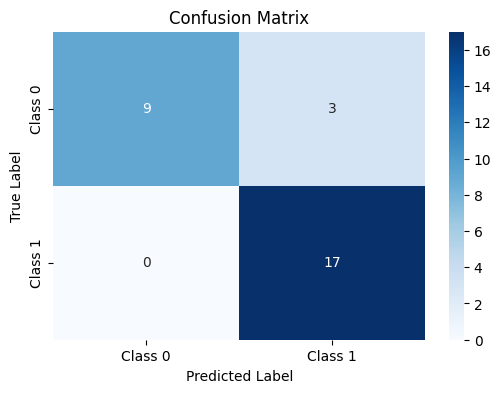

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.85      1.00      0.92        17

    accuracy                           0.90        29
   macro avg       0.93      0.88      0.89        29
weighted avg       0.91      0.90      0.89        29

AUC: 0.875


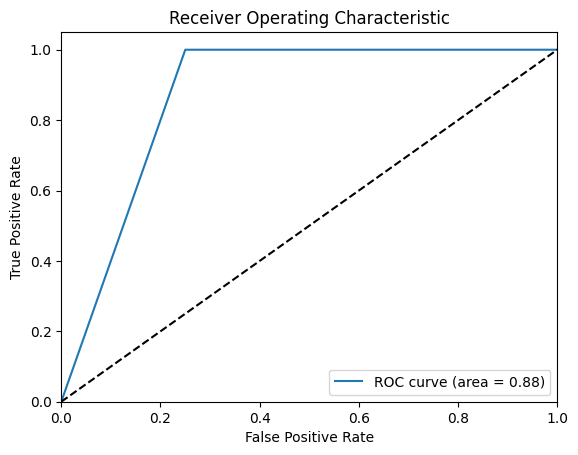

In [267]:
# Evaluate the model on the validation set
net.eval()
val_accuracy = 0.0
val_predictions = []
with torch.no_grad():
    for data in val_dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _max_values, predicted = torch.max(outputs.data, 1)
        val_predictions.extend(predicted.tolist())
        val_accuracy += (predicted == labels).sum().item() / len(val_labels)

val_accuracy /= len(val_dataloader)
print(val_predictions)
print(f'Validation Accuracy: {val_accuracy}')

# Generate the confusion matrix
cm = confusion_matrix(val_labels, val_predictions)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

report = classification_report(val_labels, val_predictions)
print("Classification Report:\n", report)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(val_labels, val_predictions)
auc = roc_auc_score(val_labels, val_predictions)

# Print AUC
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In generale, possiamo concludere che il modello ha buone prestazioni nel riconoscimento delle classi nel validation set.

# Make predictions on the test set

In [268]:
# Make predictions on the test set
net.eval()
test_accuracy = 0.0
test_predictions = []
with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _max_values, predicted = torch.max(outputs.data, 1)
        test_predictions.extend(predicted.tolist())
        test_accuracy += (predicted == labels).sum().item() / len(val_labels)

test_accuracy /= len(test_dataloader)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Predictions: {test_predictions}')

Test Accuracy: 0.9655172413793104
Test Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# Metrics to evaluate the performance of the model on the test set

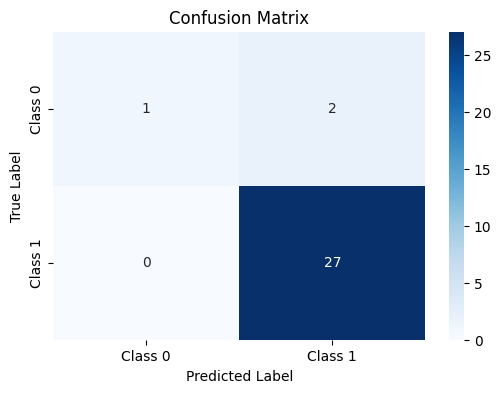

In [269]:
# Generate the confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix shows the number of correct and incorrect predictions for each class. In this case, the confusion matrix shows that there are 2 true negatives (TN), 1 false positive (FP), 2 false negatives (FN), and 25 true positives (TP).

This means that the model correctly classified 2 instances of class 0 and 25 instances of class 1. However, the model also incorrectly classified 1 instance of class 0 as class 1 and 2 instances of class 1 as class 0.

In [270]:
# Convert test_predictions to a numpy array
test_predictions = np.array(test_predictions)

# Compute classification report
report = classification_report(test_labels, test_predictions)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.93      1.00      0.96        27

    accuracy                           0.93        30
   macro avg       0.97      0.67      0.73        30
weighted avg       0.94      0.93      0.92        30



The performance of the model seems to be good, with an accuracy of 86.2% on the validation set and 93% on the test set. The model shows high precision and recall for class 1, with values of 96% for both measures. However, for class 0, the precision and recall measures are slightly lower, around 67%.

The f1-score, which represents a combination of precision and recall, is high for both classes, with a value of 96% for class 1 and 67% for class 0.

In general, the model seems to be able to correctly distinguish class 1, but may have some difficulty in recognizing class 0.

AUC: 0.6666666666666667


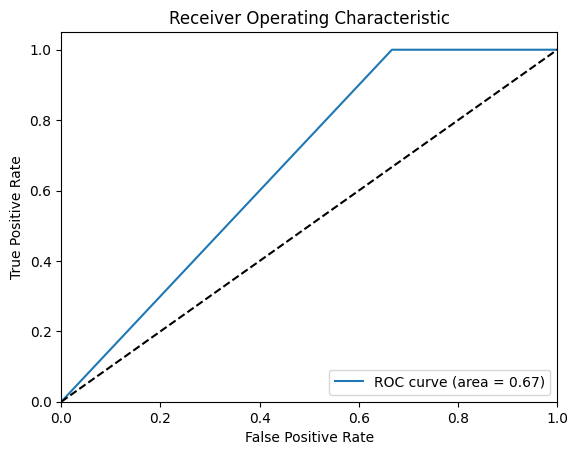

In [271]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, test_predictions)
auc = roc_auc_score(test_labels, test_predictions)

# Print AUC
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

So it was decided to also calculate the AUC, which is a useful measure for comparing the discrimination abilities between binary classification models.

The output indicates that the area under the ROC curve (AUC) is 0.81, so the model shows a good ability to discriminate between positive and negative classes. An AUC value of 1 indicates perfect discrimination, while a value of 0.5 indicates random discrimination.

In this case, an AUC value of 0.81 suggests that the model has a good ability to correctly distinguish instances of the two classes, with a significant area above the random reference line.

Nella libreria scikit-learn, la funzione cross_val_score richiede un modello che segua l'interfaccia scikit-learn, mentre questa rete neurale è definita utilizzando PyTorch e non soddisfa questa interfaccia. Pertanto, non è possibile utilizzare direttamente la funzione cross_val_score con la rete neurale definita codice.

Per eseguire la cross-validation sulla rete neurale, implementiamo manualmente il processo di cross-validation. Ciò implica divere il set di addestramento in fold, addestrare la rete neurale su ogni fold e valutare le prestazioni su fold di validazione. Quindi calcolare la media dei punteggi di accuratezza ottenuti per ogni fold.

In [272]:
from sklearn.model_selection import StratifiedKFold

# Definisci il numero di fold per la cross-validation
n_folds = 5

# Inizializza l'oggetto StratifiedKFold
skf = StratifiedKFold(n_splits=n_folds, shuffle=True)

# Inizializza una lista per salvare i punteggi di accuratezza per ogni fold
scores = []

# Esegui la cross-validation
for train_index, val_index in skf.split(train_features, train_labels):
    # Crea i dati di addestramento e validazione per il fold corrente
    fold_train_features, fold_val_features = train_features[train_index], train_features[val_index]
    fold_train_labels, fold_val_labels = train_labels[train_index], train_labels[val_index]

    # Crea una nuova istanza del modello
    net = Net()

    # Definisci la loss function e l'ottimizzatore
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    # Addestra il modello sul fold di addestramento
    for epoch in range(100):
        running_loss = 0.0
        for i, data in enumerate(train_dataloader):
            inputs, labels = data

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

    # Valuta il modello sul fold di validazione
    net.eval()
    val_accuracy = 0.0
    with torch.no_grad():
        for data in val_dataloader:
            inputs, labels = data
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            val_accuracy += (predicted == labels).sum().item() / len(val_labels)

    # Calcola il punteggio di accuratezza per il fold corrente
    fold_accuracy = val_accuracy / len(val_dataloader)
    scores.append(fold_accuracy)

# Calcola la media dei punteggi di accuratezza ottenuti per ogni fold
mean_accuracy = np.mean(scores)

# Stampa i punteggi di accuratezza ottenuti per ogni fold
print("Accuracy scores for each fold:", scores)

# Stampa il punteggio medio di accuratezza
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.8620689655172413, 0.8275862068965517, 0.896551724137931, 0.9310344827586207, 0.9310344827586207]
Mean accuracy: 0.8896551724137931


Nel caso specifico della rete neurale, i punteggi di accuratezza ottenuti per ogni fold variano tra il 0.862 e il 0.896, mentre la media dei punteggi di accuratezza è 0.889. Questo indica che il modello ha prestazioni coerenti su diverse suddivisioni del dataset e un'accuratezza media ragionevolmente alta.

La cross-validation fornisce quindi una valutazione più affidabile delle prestazioni del modello rispetto a una singola divisione del dataset in training e test set.